# **STOCK ADJUSTED CLOSING PRICE PREDICTION USING LSTM MODEL AND HISTORICAL DATA**

## **STEPS**

#### 1. **Obtaining the data**
Data can be obtained directly by downloading from yfinance.
#### 2. **Preprocessing the data**
For preprocessing the data, since we only need the adjusted closing price, we only consider it. Here, we are considering adjusted closing price instead of closing price because closing price only refers to the cost of the shares at the end of the day, the adjusted closing price considers other factors such as dividend payments, stock splits and new stock offerings.
#### 3. **Choosing a model**
We will be using a stacked LSTM model. LSTM model is used because it stores previous data and uses it to predict the future prices which is required in the stock market
#### 4. **Training the data**
Here, the data will be split into 2 - Training data and Test data. Here, we will refrain ourselves from using train_test_split or randomseed because these will split the data randomly but, stock prices depend on the previous days prices. Therefore, we will split accordingly. Then, the model will be trained on the data
#### 5. **Testing of the model**
The model will later be tested and then, we will predict the adjusted closing prices for the next 30 days.

Here, we will be predicting the stock adjusted closing price of Microsoft (MSFT). So, for that, download the data of MSFT from yfinance into a csv 'MSFT.csv'.

In [31]:
# importing all the required python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [3]:
# Reading the csv file into a pandas dataframe
data = pd.read_csv('MSFT.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060657,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062823,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063906,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062281,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061198,47894400


In [5]:
# Taking only the required columns
data = data[['Date', 'Adj Close']]
data.head()

,Date,Adj Close
0,1986-03-13,0.060657
1,1986-03-14,0.062823
2,1986-03-17,0.063906
3,1986-03-18,0.062281
4,1986-03-19,0.061198


In [6]:
data.dtypes

Date          object
Adj Close    float64
dtype: object

In [7]:
# Converting 'Date' from a string to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [9]:
data.dtypes

Date         datetime64[ns]
Adj Close           float64
dtype: object

In [10]:
# Sorting the prices according to the date
data.sort_values(by=['Date'], ascending=True, inplace=True)

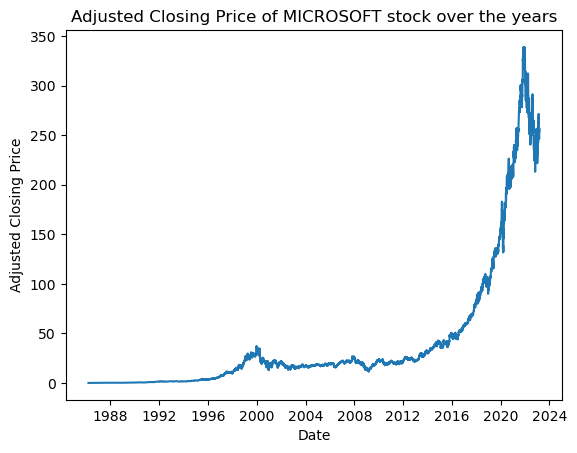

In [11]:
#Plotting a graph 
plt.plot(data['Date'], data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.title('Adjusted Closing Price of MICROSOFT stock over the years')
plt.show()

In [13]:
data.drop('Date', axis=1, inplace= True)

In [14]:
data.head()

,Adj Close
0,0.060657
1,0.062823
2,0.063906
3,0.062281
4,0.061198


Since LSTM is sensitive to unscaled data, we will have to scale the data.

In [15]:
#scaling the data to the range (0,1)
scaling = MinMaxScaler(feature_range=(0,1)) 
data = scaling.fit_transform(np.array(data).reshape(-1,1)) 

In [16]:
#Splitting data
training = int(len(data)*0.8)
testing = len(data) - training
train, test = data[0:training,:], data[training:len(data),:]

In [17]:
training, testing

(7457, 1865)

In [21]:
#Function to create a dataset i.e converting an array to a matrix with every row being a row of features i.e stock prices
# and y being the next day's price
def conversion(data, numoffeatures):
    P = []
    Q = []
    for i in range(len(data) - numoffeatures - 1):
        a = data[i:(i+numoffeatures), 0]
        P.append(a)
        Q.append(data[i+numoffeatures,0])
    return np.array(P), np.array(Q)

**Let numoffeatures = 100 i.e stock price of a day depends on the stock prices of previous 100 days**

In [22]:
numoffeatures = 100
X_train, y_train = conversion(train, numoffeatures)
X_test, y_test = conversion(test, numoffeatures)

In [23]:
# Reshaping the data into 3D input for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

**Creating the stacked LSTM Model**

In [25]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


**Training the model**

In [28]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 100, batch_size=64, verbose=1)

Train on 7356 samples, validate on 1764 samples
Epoch 1/100
7356/7356 [==============================] - 26s 4ms/sample - loss: 9.0636e-06 - val_loss: 0.0066
Epoch 2/100
7356/7356 [==============================] - 25s 3ms/sample - loss: 8.3717e-06 - val_loss: 0.0066
Epoch 3/100
7356/7356 [==============================] - 25s 3ms/sample - loss: 7.7948e-06 - val_loss: 0.0050
Epoch 4/100
7356/7356 [==============================] - 25s 3ms/sample - loss: 7.2448e-06 - val_loss: 0.0045
Epoch 5/100
7356/7356 [==============================] - 26s 3ms/sample - loss: 6.9242e-06 - val_loss: 0.0033
Epoch 6/100
7356/7356 [==============================] - 25s 3ms/sample - loss: 6.3713e-06 - val_loss: 0.0029
Epoch 7/100
7356/7356 [==============================] - 26s 3ms/sample - loss: 6.8782e-06 - val_loss: 0.0026
Epoch 8/100
7356/7356 [==============================] - 26s 3ms/sample - loss: 5.7448e-06 - val_loss: 0.0029
Epoch 9/100
7356/7356 [==============================] - 25s 3ms/sample 

**Predicting for training and testing data**

In [29]:
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

**Since we scaled the input, we will have to do inverse scaling to get the output**

In [30]:
predict_train = scaling.inverse_transform(predict_train)
predict_test = scaling.inverse_transform(predict_test)

In [35]:
# Calculating the RMSE for train data
print("The RMSE for the training data is " +str(math.sqrt(mean_squared_error(y_train, predict_train))))

The RMSE for the training data is 17.927987080451118


In [37]:
# Calculating the RMSE for test data
print("The RMSE for the test data is " +str(math.sqrt(mean_squared_error(y_test, predict_test))))

The RMSE for the test data is 169.92301755283555


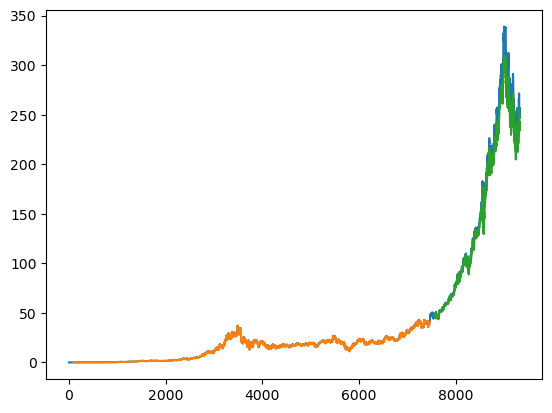

In [40]:
# Plotting the actual graph and the predicted values for training and test data
PredictedTrain=np.empty_like(data)
PredictedTest=np.empty_like(data)

PredictedTrain[:,:]=np.nan
PredictedTest[:,:]=np.nan

PredictedTrain[100:len(predict_train)+100,:]=predict_train
PredictedTest[len(data)-len(predict_test):len(data),:]=predict_test

plt.plot(scaling.inverse_transform(data)) # Blue
plt.plot(PredictedTrain) # Orange
plt.plot(PredictedTest) # Green

**Now, we are going to predict the stock prices for the next 30 days. For that we would require previous 100 days stock prices**

In [84]:
# Taking the last 100 days values
X_input = data[len(data) - 100:].reshape(1,-1)

**Here, we are predicting for the first day using the 100 days we have and then adding the predicted value to the input and shifting the days by 1 i.e now taking from 1 to 101 days (101 being the predicted and added value) and we continue this process for 30 times till the values for 30 days are predicted.**

In [88]:
# output has the stock prices for the next 30 days
output=[]
temp_input=list(X_input)
temp_input=temp_input[0].tolist()
for i in range(0,30):
    input = np.array(temp_input)
    input = input.reshape((1, 100,1))
    y_temp = model.predict(input)
    temp_input.extend(y_temp[0].tolist())
    output.extend(y_temp.tolist())
    temp_input=temp_input[1:]

**Plotting the actual data and predicted stock prices**

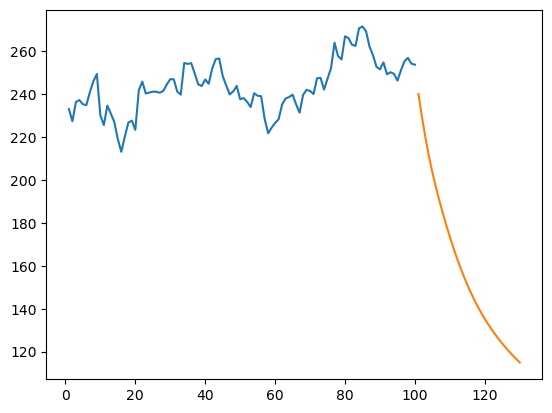

In [95]:
day_old = np.arange(1,101)
day_pred = np.arange(101,131)

plt.plot(day_old, scaling.inverse_transform(data[len(data)-100:]))
plt.plot(day_pred, scaling.inverse_transform(output))
plt.show()

**This method of predicting stock prices using LSTM Model is not really efficient. Some of the reasons are the following :-**
1. Using MinMaxScaler, the values are scaled according the minimum and maximum values in the given dataset. This eliminates the possibility of the stock doing really well or really bad in the market. The stock might close at a price which is the highest of all time or lowest of all time, this is eliminated here
2. LSTMs are used because they store data but, stock prices don't depend only on the previous prices but on many others like, failure of a product, launch of a new product, social media and etc.
3. Using LSTMs for stock price predictions that we are completely disregarding the random walk theory.

**Therefore, this project is entirely for educational purposes**